<a href="https://colab.research.google.com/github/MuizzuddinRifqi/2141720027-PCVK-2023/blob/main/Pertemuan%2010%20-%20Tresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : M. Muizzuddin Rifqi**

**Nim   : 2141720027**

**Kelas : TI-3E**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
# import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


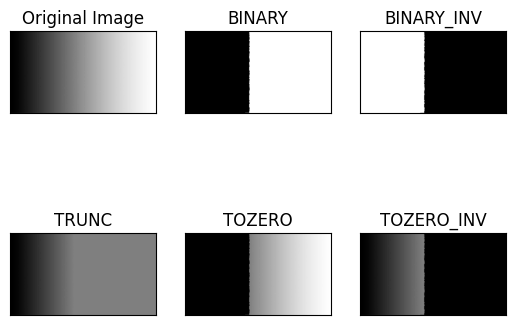

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/image/gradient.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/image/riyanto.png',0)
ktp = cv.imread('/content/drive/MyDrive/PCVK/image/riyanto.png',0)

global tershold


In [ ]:
# global treshold
globalImage = original.copy()
thresh = 90
_, result = cv.threshold(globalImage, thresh, 255, cv.THRESH_BINARY)
# or do manually by following
globalImage[globalImage > thresh] = 255
globalImage[globalImage <= thresh] = 0

Otsu Thresholding

In [ ]:
def _compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

In [ ]:
def otsuThresholding(img: np.ndarray) -> np.ndarray:
    threshold_range = range(np.max(img)+1)
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    binary = img
    binary[binary > best_threshold] = 255
    binary[binary <= best_threshold] = 0

    return binary

In [ ]:
OtsuTresh = otsuThresholding(original)

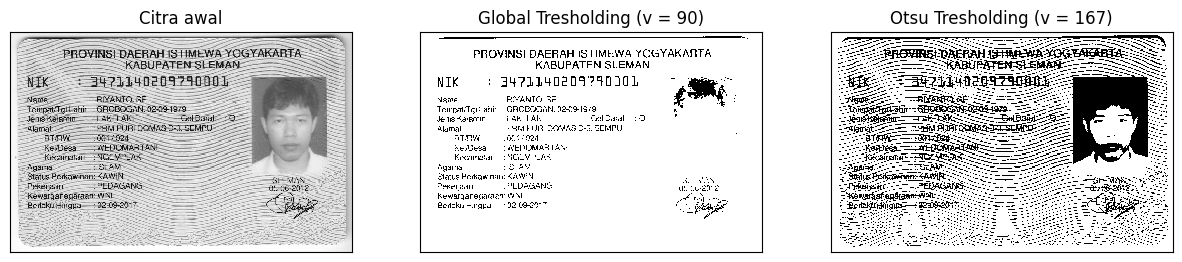

In [ ]:
titles = ['Citra awal', 'Global Tresholding (v = 90)', 'Otsu Tresholding (v = 167)']
images = [ktp, globalImage, OtsuTresh]
plt.figure(figsize = (15,9))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder image

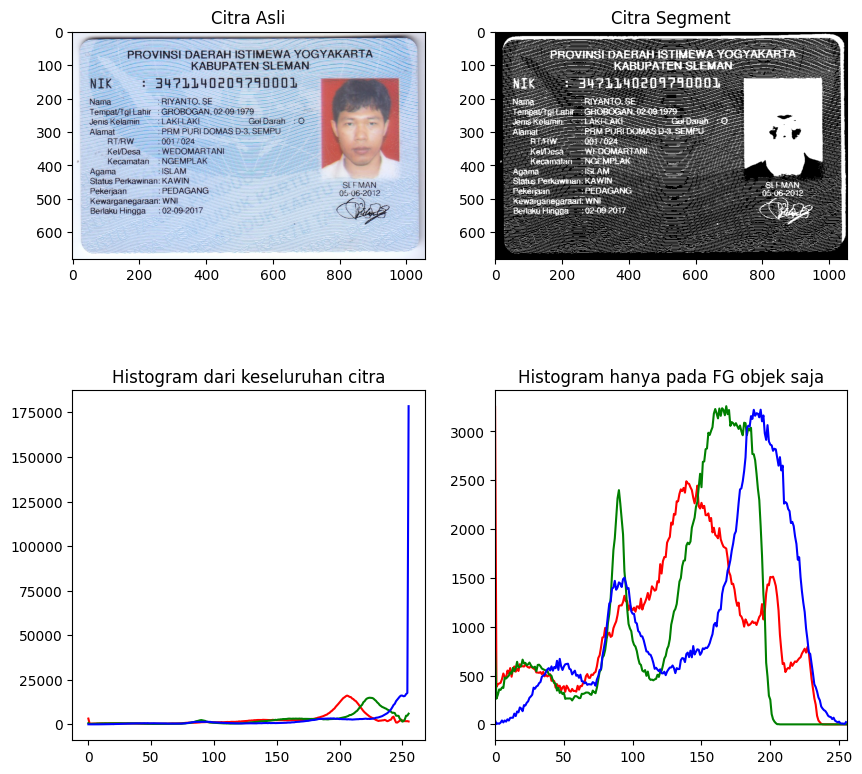

In [ ]:
# Load the segmented image (foreground image)
pict_3 = ('/content/drive/MyDrive/PCVK/image/riyanto.png')
img_l = cv.imread(pict_3)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()


6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

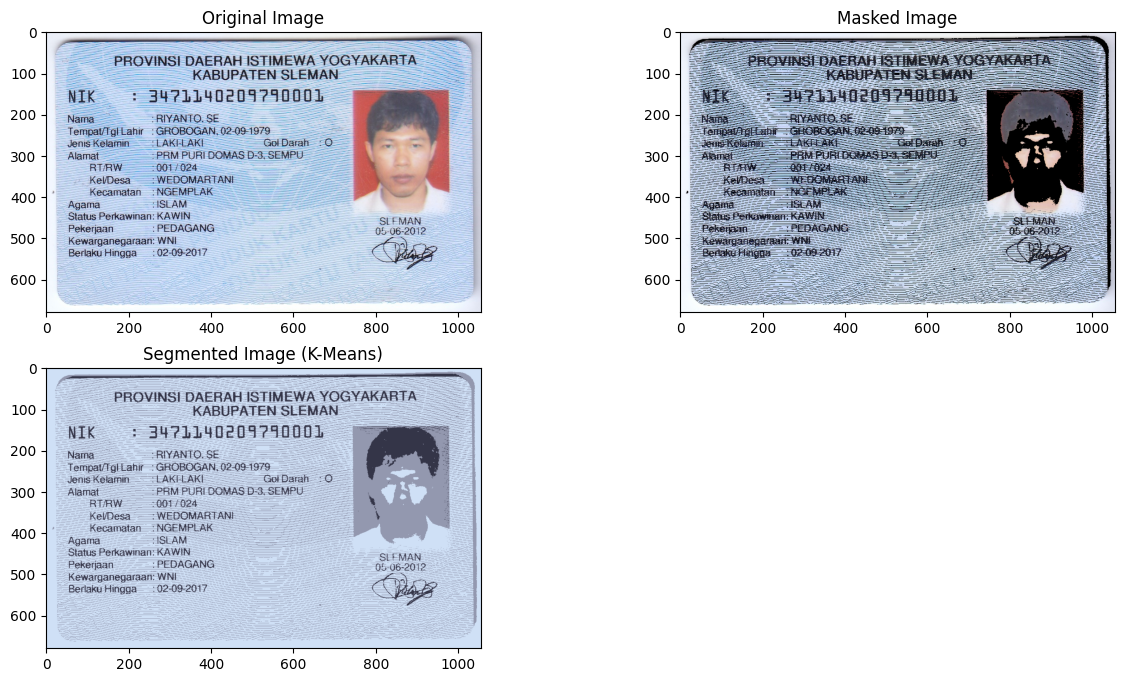

In [ ]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/PCVK/image/riyanto.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters

# Apply K-Means clustering
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into black
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_blue = 2
masked_image[labels == cluster_to_blue] = [0, 0, 0]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

## Tugas Praktikum

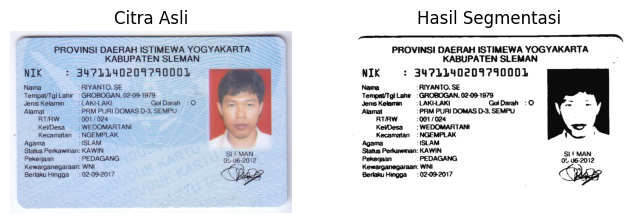

In [ ]:
citraAwal = cv.imread('/content/drive/MyDrive/PCVK/image/riyanto.png')
citraAwal = cv.cvtColor(citraAwal, cv.COLOR_BGR2RGB)
imgKtp = cv.imread('/content/drive/MyDrive/PCVK/image/riyanto.png', cv.IMREAD_GRAYSCALE)

# Tresholding citra menggunakan Otsu Tresholding
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(imgKtp,(5,5),0)
ret3,th_img = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# melakukan segmentasi menggunakan K-means
# Flatten the pixel values
img_flatt = th_img.reshape((-1, 2))
img_flatt = np.float32(img_flatt)

# mendefinisikan kriteria dan menentukan jumlah klaster yang dipakai
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters

# Apply K-Means clustering
_, labels, centers = cv.kmeans(img_flatt, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(centers)
res = center[labels.flatten()]
segmented_img = res.reshape((th_img.shape))

# Menampilkan gambar asli dan hasil segmentasi K-Means
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(citraAwal)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Segmentasi')
plt.axis('off')

plt.show()